## Get Started with PyTorch

An open source machine learning framework that accelerates the path from research prototyping to production deployment.

```py
pip install torch
```

### Table of Contents:

1. [Basics](#Basics)
2. [Tensor Operations](#Basic_Operations)
3. [Extra PyTorch operations based on Tensor Shape](#Extra_PyTorch_operations_based_on_Tensor_Shape)
4. [Ouickstart- Build A Neural Network](#Quickstart)

In [1]:
import torch
import numpy as np

## Basics

Just like Tensorflow, we shall continue playing with Tensors in PyTorch as well. 

### Create Tensor From Data(List)

In [2]:
data = [[1, 2],[3, 4]]
tensors = torch.tensor(data)

In [3]:
tensors

tensor([[1, 2],
        [3, 4]])

### Create from NumPy

In [36]:
np_array = np.arange(10)
tensor_np = torch.from_numpy(np_array)

In [37]:
tensor_np

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Shape, ndim and dtype

This is same as we saw in Numpy Tutorial - Day 1

In [38]:
tensor_np.shape

torch.Size([10])

In [39]:
tensor_np.ndim

1

In [40]:
tensor_np.dtype

torch.int64

## Tensor_Operations

In [4]:
ten1 = torch.tensor([1,2,3])
ten2 = torch.tensor([4,5,6])
ten1+ten2

tensor([5, 7, 9])

You can either use `+` or `torch.add` to perform Tensor Additions

In [5]:
torch.add(ten1,ten2)

tensor([5, 7, 9])

In [6]:
torch.sub(ten2,ten1)

tensor([3, 3, 3])

In [7]:
torch.subtract(ten2,ten1)

tensor([3, 3, 3])

You can either use `-` or `torch.sub` to perform Tensor Additions

In [22]:
ten1*10

tensor([10, 20, 30])

### very important operation in Deep Learning- Matrix Multiplication

***Rules of Matrix Multiplication:***
- (3,2) * (3,2) = Error
- (4,3) * (3,2) = (4,2)
- (2,2) * (2,5) = (2,5)

In [10]:
torch.matmul(ten1,ten2)

tensor(32)

In [26]:
matrix4_3 = torch.tensor([[1,2,3],
                        [4,5,6],
                        [7,8,9],
                        [10,11,12]])

In [27]:
matrix4_3.shape

torch.Size([4, 3])

In [28]:
matrix3_2 = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])

In [29]:
matrix3_2.shape

torch.Size([3, 2])

In [30]:
result = torch.matmul(matrix4_3,matrix3_2) #=> will result in (4,2)

In [31]:
result

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [32]:
result.shape

torch.Size([4, 2])

You can also use `torch.mm()` which is a short for `torch.matmul()`

In [41]:
torch.mm(matrix4_3,matrix3_2)

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [42]:
#transpose of tensor
matrix4_3

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [43]:
matrix4_3.T

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

In [46]:
torch.t(matrix4_3)

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

## Extra_PyTorch_operations_based_on_Tensor_Shape
- Zeros
- Ones
- Random
- Full

In [12]:
tensorZeroes = torch.zeros((3,3))
tensorZeroes

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [13]:
tensorOnes = torch.ones((3,3))
tensorOnes

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [17]:
tensorRandomN = torch.randn((3,3))  #includes negative tensors
tensorRandomN

tensor([[-0.0096,  0.3583, -0.3557],
        [-0.6203,  0.4666,  1.5985],
        [ 0.0276,  0.9901, -0.3083]])

In [19]:
tensorRandom = torch.rand((3,3))  #includes only positive tensors
tensorRandom

tensor([[0.6250, 0.4580, 0.8169],
        [0.1864, 0.3173, 0.2519],
        [0.7456, 0.7896, 0.2160]])

In [20]:
customFill = torch.full((3,3),5)
customFill

tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])

In [21]:
initialFill = torch.full((3,3),0.01)
initialFill

tensor([[0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100]])

## Quickstart

Install Torchvision, The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

```py
pip install torchvision --no-deps
```

In [49]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [48]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [50]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [51]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

`Dataloader` wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

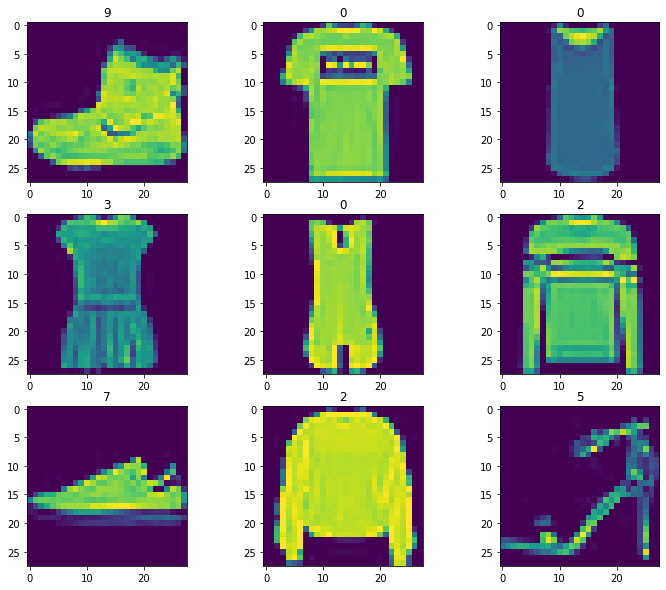

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    sample_image,sample_label = training_data[i]
    plt.imshow(sample_image[0])
    plt.title(sample_label)

In [55]:
batch_size = 64

training = DataLoader(training_data,batch_size=batch_size)
testing = DataLoader(test_data, batch_size=batch_size)

for X, y in testing:
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape}")
    break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64])


In [58]:
for X,y in training:
    print(torch.max(X))
    print(torch.min(X))
    break

tensor(1.)
tensor(0.)


We need not to scale as `DataLoader` will take care of it

In [59]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.build_model = nn.Sequential(
            nn.Linear(28*28,512), #28*28 is input shape
            nn.ReLU(),
            nn.Linear(512,512), #hidden layer
            nn.ReLU(),
            nn.Linear(512,10) #output layer
        )
    def forward(self,x):
        x = self.flatten(x)
        dnn = self.build_model(x)
        return dnn 

In [60]:
model = NeuralNetwork()

In [62]:
# compile model - Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [68]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [69]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [70]:
for epoch in range(5):
    print(f"Epochs {epoch+1}")
    train(training, model, loss_fn, optimizer)
    test(testing, model, loss_fn)
print("Done!")

Epochs 1
loss: 2.310659  [    0/60000]
loss: 2.192680  [ 6400/60000]
loss: 1.950534  [12800/60000]
loss: 1.762310  [19200/60000]
loss: 1.438842  [25600/60000]
loss: 1.281911  [32000/60000]
loss: 1.178925  [38400/60000]
loss: 1.043956  [44800/60000]
loss: 1.003614  [51200/60000]
loss: 0.917325  [57600/60000]
Test Error: 
 Accuracy: 68.5%, Avg loss: 0.908657 

Epochs 2
loss: 0.937900  [    0/60000]
loss: 0.964800  [ 6400/60000]
loss: 0.715048  [12800/60000]
loss: 0.905788  [19200/60000]
loss: 0.734225  [25600/60000]
loss: 0.740123  [32000/60000]
loss: 0.778220  [38400/60000]
loss: 0.753288  [44800/60000]
loss: 0.730043  [51200/60000]
loss: 0.718717  [57600/60000]
Test Error: 
 Accuracy: 75.7%, Avg loss: 0.699567 

Epochs 3
loss: 0.669396  [    0/60000]
loss: 0.761377  [ 6400/60000]
loss: 0.522985  [12800/60000]
loss: 0.769466  [19200/60000]
loss: 0.625706  [25600/60000]
loss: 0.626813  [32000/60000]
loss: 0.653963  [38400/60000]
loss: 0.692355  [44800/60000]
loss: 0.656009  [51200/60000]

We will explore more about Neural Network in next notebook sequence. 